# Explore and Prepare the Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset with a different encoding
file_path = "C:\\Users\\HP\\Downloads\\3bcbe6_03c8cdcc93024d4f8edcb01422acfce7.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \


In [5]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000           

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [7]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

In [8]:
# Fill missing values in numeric columns with the median
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))


In [9]:
# Fill missing values in categorical columns with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [10]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin', 'flight_day'], drop_first=True)


In [11]:
# Check the prepared dataset
print("\nPrepared dataset:")
print(df.head())


Prepared dataset:
   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_Mobile  ...  \
0             5.52                 0                 False  ...   
1             5.52           

# Train a Machine Learning Model

In [12]:
# 'booking_complete' is the target variable we're trying to predict
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Initialize and train the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Output feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

In [16]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [17]:
print("\nFeature importance:")
print(feature_importance_df)


Feature importance:
                             Feature  Importance
1                      purchase_lead    0.147408
3                        flight_hour    0.121416
2                     length_of_stay    0.110715
0                     num_passengers    0.048321
7                    flight_duration    0.036964
..                               ...         ...
875            booking_origin_Panama    0.000000
876  booking_origin_Papua New Guinea    0.000000
877          booking_origin_Paraguay    0.000000
542                     route_KIXLBU    0.000000
492                     route_JOGKTM    0.000000

[918 rows x 2 columns]


# Evaluate the Model and Present Findings

In [18]:
# Evaluate the model on the test set
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

In [19]:
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


Evaluation Metrics:
Accuracy: 0.8521333333333333
Precision: 0.4981751824817518
Recall: 0.12319494584837545
F1 Score: 0.1975397973950796
ROC AUC: 0.7762488252463593


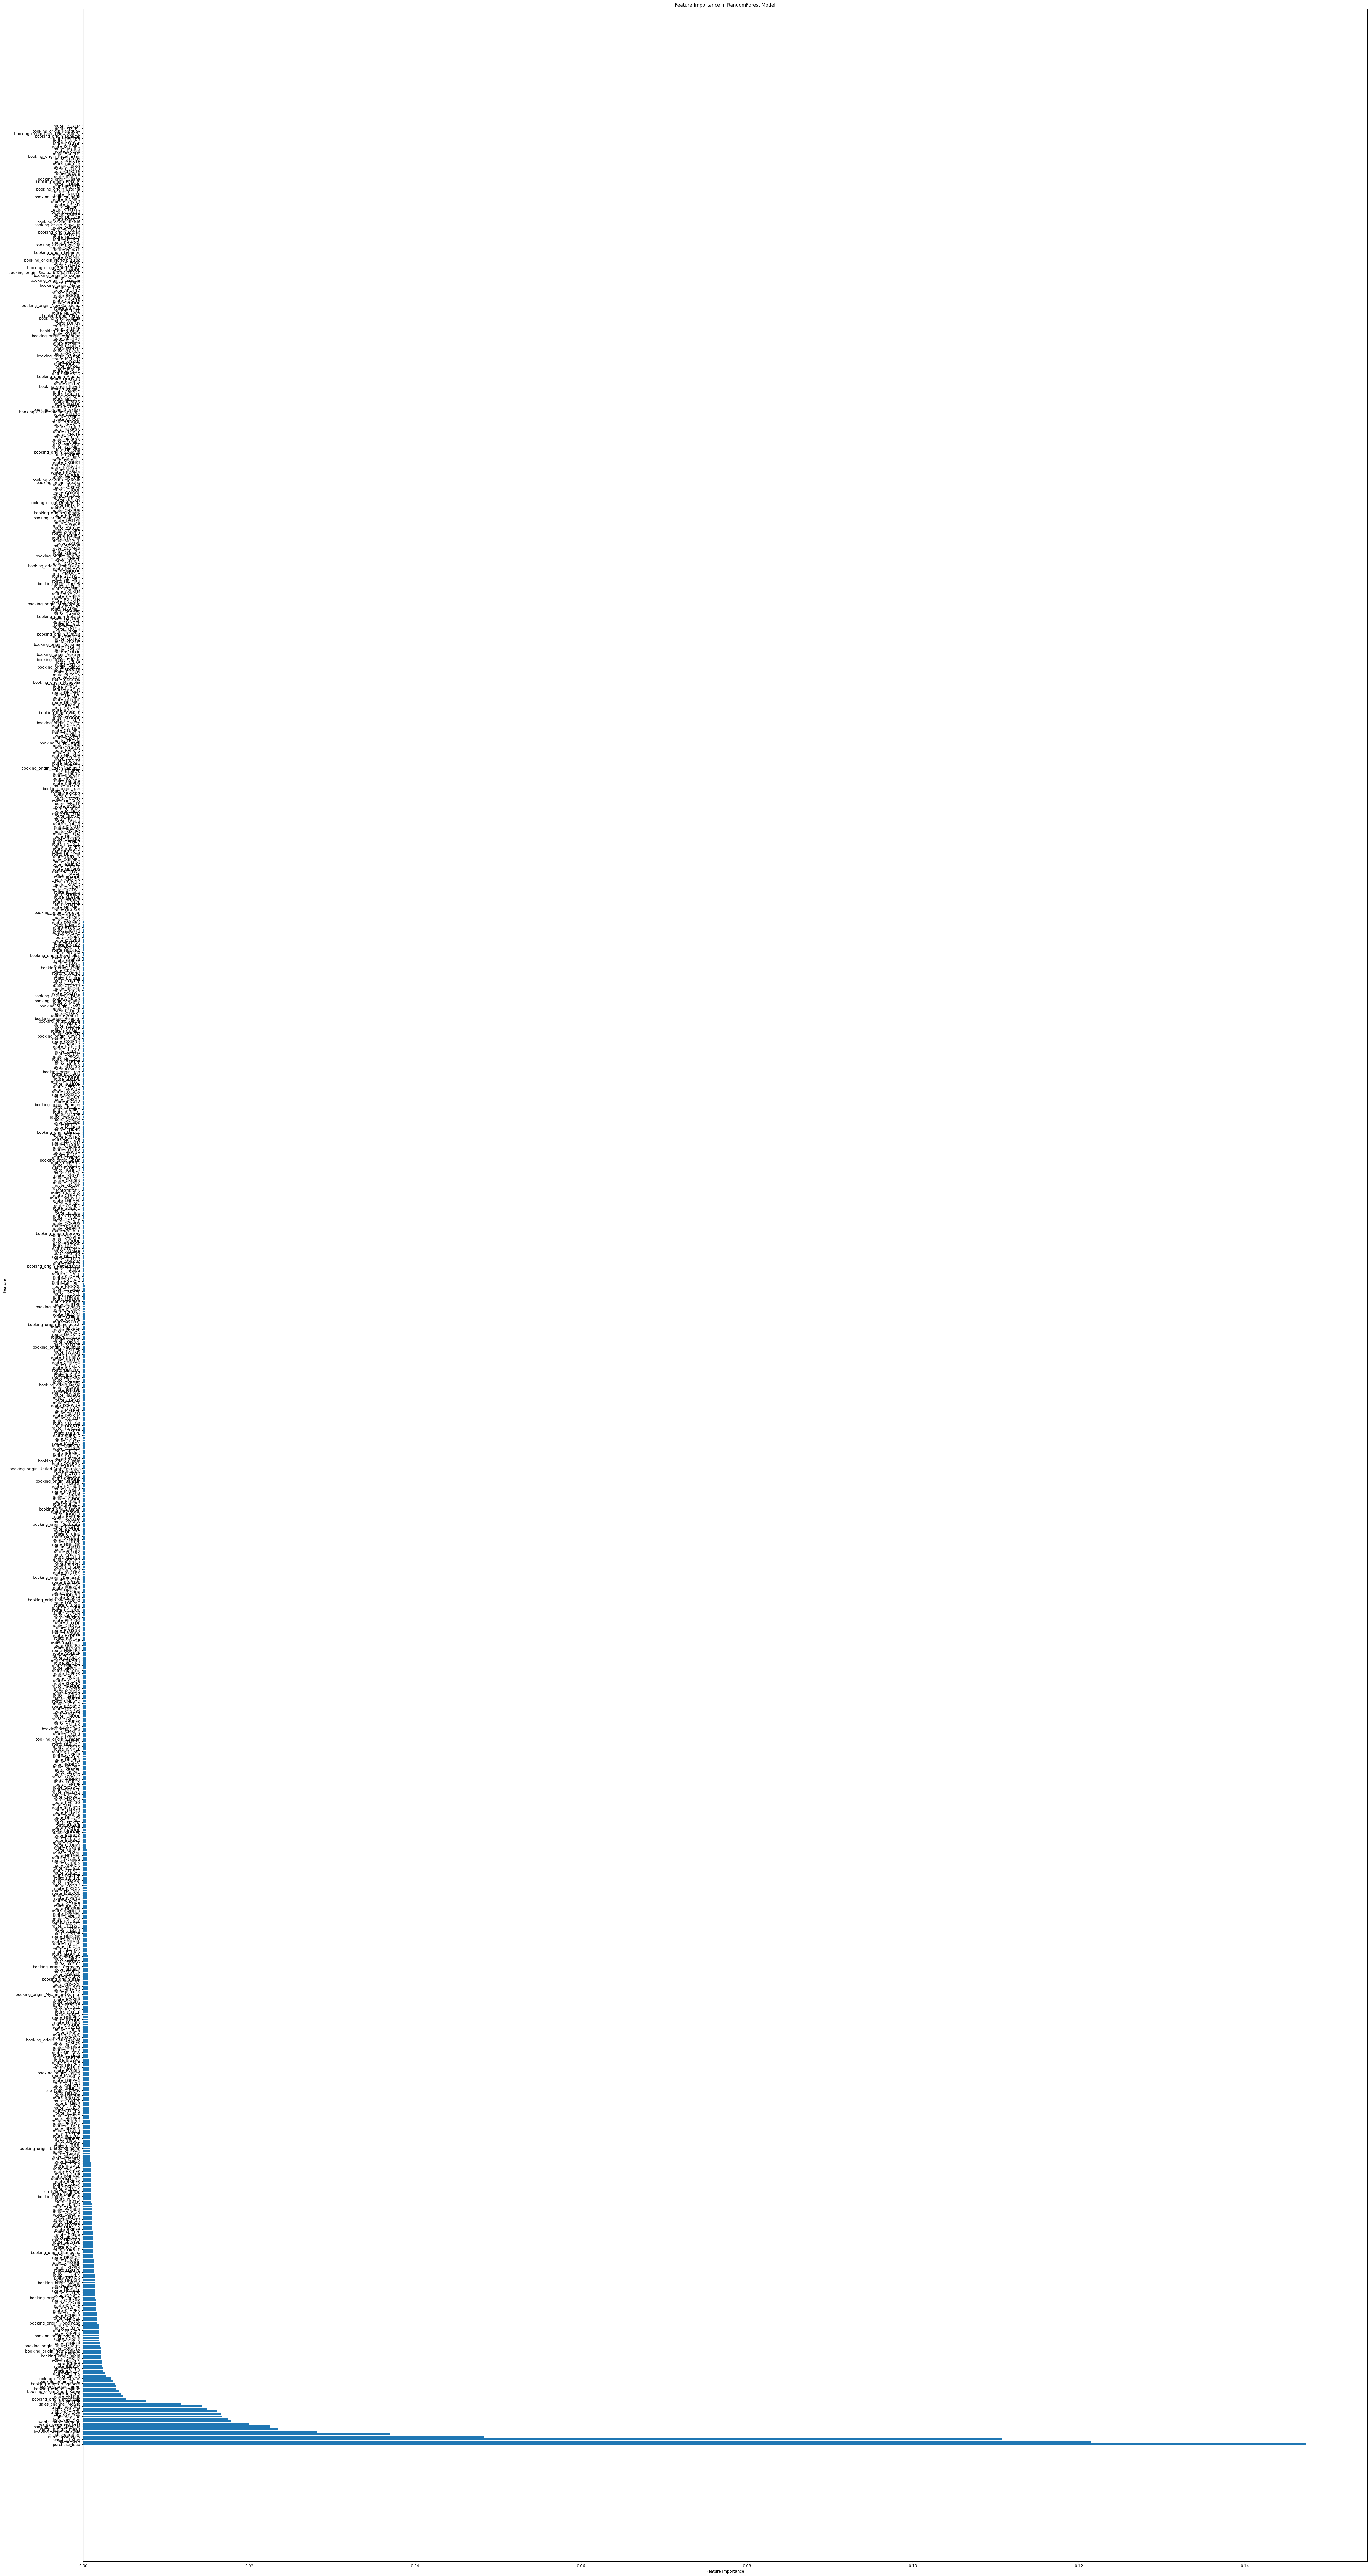

In [31]:
# Plot feature importance
plt.figure(figsize=(60, 120))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForest Model')
plt.show()

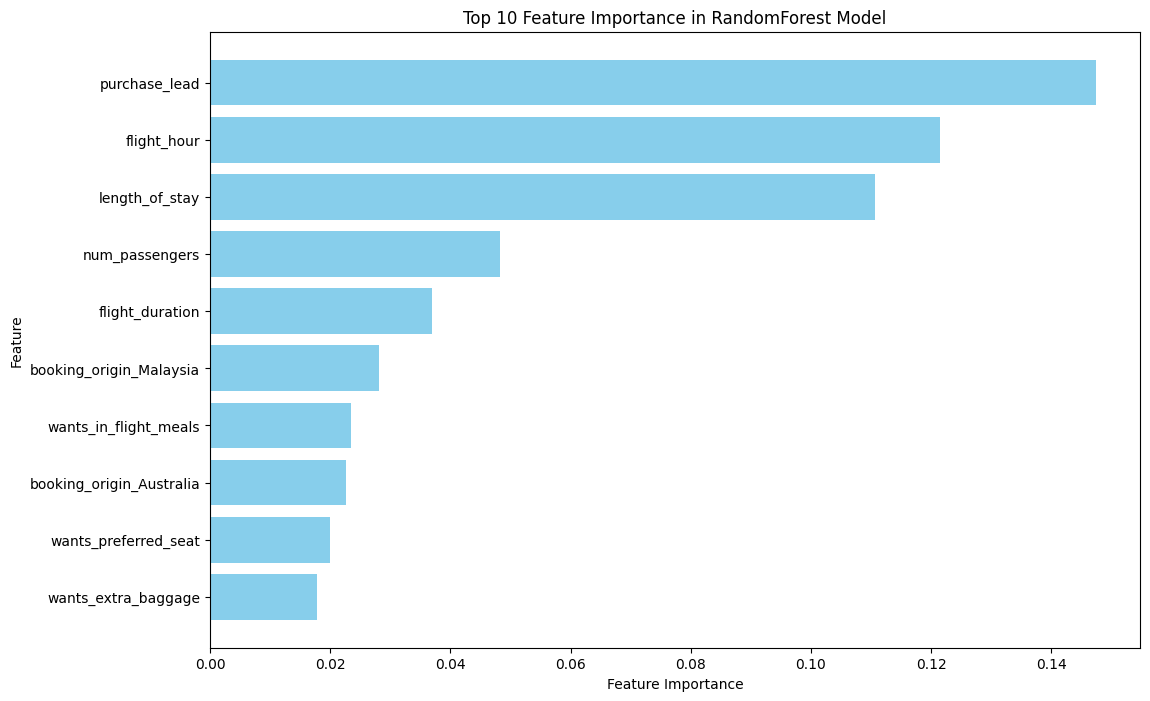

In [27]:
# Number of top features to display
top_n = 10

# Select the top N most important features
top_features = feature_importance_df.head(top_n)

# Plot feature importance for the top N features
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance in RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()
